In [1]:
#from preprocessing using all the code necessary for this
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import copy
import time
import math
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('final_data.csv')

df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,<1h ocean,inland,near bay,near ocean
0,2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0.0,0.0,1.0,0.0
1,3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0.0,0.0,1.0,0.0
2,4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0.0,0.0,1.0,0.0
3,5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,0.0,0.0,1.0,0.0
4,6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,0.0,0.0,1.0,0.0


In [2]:
X = df.drop(columns=['median_house_value'],axis=1)
X.drop('Unnamed: 0',axis=1,inplace=True)
y = df['median_house_value']

In [3]:
scaler = StandardScaler()
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train_np= scaler.fit_transform(X_tr)
X_test_np = scaler.transform(X_te)
print(X_train_np.shape, X_test_np.shape, y_tr.shape, y_te.shape)
# print(y_tr.info())
# print(X_train_np[0])

y_train=y_tr.to_list()
y_test=y_te.to_list()
X_train=X_train_np.tolist()
X_test=X_test_np.tolist()
# print(y_tr)


(13424, 11) (3356, 11) (13424,) (3356,)


## Pure Python Implementation ##

In [4]:
def cost_per_eg(x, w, b): 

    n = len(x) #no. of features
    #here x is a particular eg hence an array of length n
    p = 0
    for i in range(n):
        p += x[i]*w[i]        
    p += b                
    return p

In [5]:
def cost(X,y,w,b,cost_per_eg):
    m = len(X)
    cost = 0.0

    for i in range(m):
        cost+=(cost_per_eg(X[i],w,b)-y[i])**2
    cost/=(2*m)
    return cost

In [6]:
def give_gradient(X, y, w, b,cost_per_eg): 
  
    m,n = len(X),len(X[0])
    #m=number of examples, n=number of features
    dj_dw = [0.0]*n
    dj_db = 0.0

    for i in range(m):                             
        err = cost_per_eg(X[i],w,b) - y[i]   
        for j in range(n):                         
            dj_dw[j] += err * X[i][j]/m   
        dj_db += err/m                                                       
        
    return dj_dw,dj_db

In [7]:
def gradient_descent(X, y, w_in, b_in, cost, give_gradient,cost_per_eg, alpha, iterations):
    
    J_prev = []
    m,n = len(X), len(X[0])
    w = w_in
    b = b_in
    for i in range(iterations):
        # print(0)
        dj_dw,dj_db = give_gradient(X, y, w, b,cost_per_eg)

        b -= alpha * dj_db               
        for j in range(n):
            w[j] -= alpha*dj_dw[j]
        # print(1)
        J_prev.append(cost(X, y, w, b,cost_per_eg))

        # Print cost every at intervals 10 times or as many iterations if < 10
        # print("inside loop")
        # print(2)
        if i%1000 == 0:
            print(f"Iteration {i:4d}: Cost {J_prev[-1]:8.2f}   ")
            # print(f"Iteration {i:4d}: dj_dw {dj_dw}, dj_db {dj_db}")
            # print(w)
            # print(b)
        
        # print("inside loop")
        # print(3)
    return w, b, J_prev #return final w,b and J history for graphing

In [8]:
# Mean Absolute Error (MAE)
# Root Mean Squared Error (RMSE)
# R-squared (R2 Score)
def mean_absolute_error(y_pred,y_true):
    m = len(y_pred)
    mae = 0
    for i in range(m):
        mae += abs(y_true[i] - y_pred[i])/m
    return mae

def root_mean_square(y_pred, y_true):
    m = len(y_pred)
    rms = 0

    for i in range(m):
        rms += ((y_true[i] - y_pred[i])**2)/m
    
    return math.sqrt(rms)

def r_squared(y_pred, y_true):
    num = 0
    den = 0
    m = len(y_pred)
    mean_true = sum(y_true)/m
    for i in range(m):
        num += (y_pred[i] - y_true[i])**2
        den += (y_true[i] - mean_true)**2
    
    r_sq = 1 - num/den
    return r_sq

def predict_y(X_test, w, b):
    y_pred = [0]*(len(X_test))

    for i in range(len(X_test)):
        y_pred[i] = cost_per_eg(X_test[i],w,b)

    return y_pred

In [9]:
# initialize parameters
m,n = len(X_train), len(X_train[0])
w_in= [0]*n
b_in = 0.0

iters = 10000
alpha = 0.7
# run gradient descent 
start = time.time()
w_pred,b_pred,cost_iteration = gradient_descent(X_train, y_train, w_in, b_in, cost, give_gradient,cost_per_eg, alpha, iters)
end = time.time()
t = end-start
print(f"b,w found by gradient descent: ")
print(f"b: {b_pred}")
print(f"w: {w_pred}")
print(f"time taken for 10000 iterations is {t}")


y_pred = predict_y(X_test, w_pred, b_pred)
print("\n\n-------------------------------------------\n\n")
print("Mean absolute error (MAE): {0}".format(mean_absolute_error(y_pred,y_test)))
print("Root mean square error (RMSE): {0}".format(root_mean_square(y_pred,y_test)))
print("R-squared score (R^2 Score): {0}".format(r_squared(y_pred,y_test)))

Iteration    0: Cost 4142613529.69   


KeyboardInterrupt: 

10000


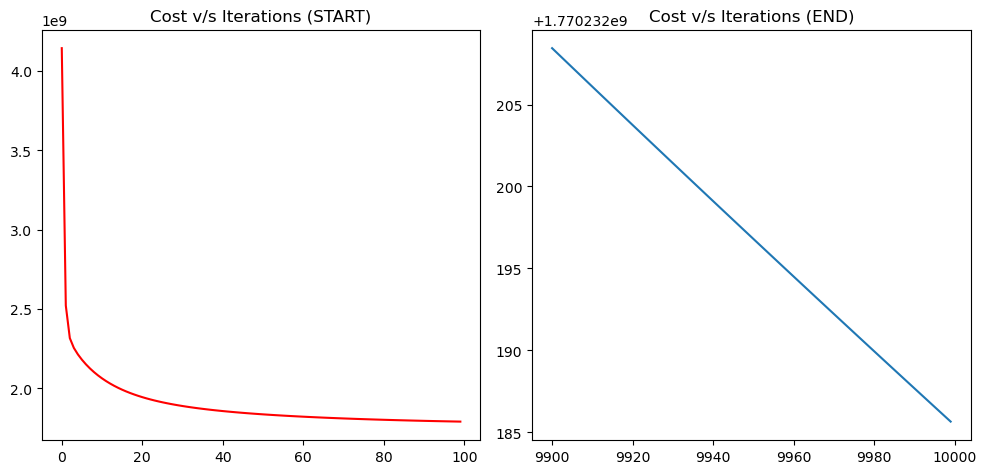

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
print(len(cost_iteration))
axs[0].plot(cost_iteration[:100],c='r')
axs[0].set_title("Cost v/s Iterations (START)")
axs[1].plot(9900 + np.arange(100),cost_iteration[9900:])
axs[1].set_title("Cost v/s Iterations (END)")
plt.tight_layout()
plt.show()

## Numpy Implementation ##


In [ ]:
#We will be using X_train_np, X_test_np, y_train, y_test
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
#dimension of X_train_np and X_test_np = (m,n)
#dimension of y_train_np and y_test_np = (m,)
#dimension of w = (n,)

def costnp(X,y,w,b):
    m = X.shape[0]
    pred = np.dot(X,w)+ b
    err = pred - y
    er = err**2
    cost = np.sum(er)
    cost /= (2*m)

    return cost


In [ ]:
#dimension of X_train_np and X_test_np = (m,n)
#dimension of y_train_np and y_test_np = (m,)
#dimension of w = (n,)

def give_gradientnp(X, y, w, b): 
  
    m,n = X.shape         #(number of examples, number of features)
    dj_db = 0.0

    pred = np.dot(X,w)+b
    err = pred - y
    total_error = np.sum(err)
    dj_db = total_error/m
    err= err.reshape(-1,1)
    mat = err * X
    dj_dw = np.sum(mat,axis=0)/m                                                   
        
    return dj_dw,dj_db
#returns a 1d array of dj_dw with size (n,)


In [ ]:
#dimension of X_train_np and X_test_np = (m,n)
#dimension of y_train_np and y_test_np = (m,)
#dimension of w = (n,)
#dimension of dj_dw = (n,)

def gradient_descentnp(X, y, w_in, b_in, costnp, give_gradientnp, alpha, iterations):
    
    J_prev_np= []
    m,n = X.shape
    w = w_in
    b=b_in
    for i in range(iterations):
        # print(0)
        dj_dw,dj_db = give_gradientnp(X, y, w, b)

        b -= alpha * dj_db               
        w -= alpha * dj_dw
        # print(1)
        J_prev_np.append(costnp(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        # print("inside loop")
        # print(2)
        if i% math.ceil(iterations / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_prev_np[-1]:8.2f}   ")
            # print(f"Iteration {i:4d}: dj_dw={dj_dw} dj_db={dj_db}   ")
            # print(w)
            # print(b)
        
        # print("inside loop")
        # print(3)
    return w, b, J_prev_np #return final w,b and cost history for graphing

In [ ]:
def mean_absolute_error_np(y_pred,y_true):
    return np.mean(np.abs(y_true-y_pred))

def root_mean_square_np(y_pred, y_true):
    return np.sqrt(np.mean((y_true - y_pred)**2))

def r_squared_np(y_pred, y_true):
    num = np.sum((y_true - y_pred) ** 2)
    den = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (num/den)

def predict_y_np(X_test, w, b):
    return np.dot(X_test,w)+b

In [ ]:
# initialize parameters
m,n = X_train_np.shape
w_i= np.zeros(n,dtype=np.float64)
b_i = 0.0

iters = 10000
alpha = 0.7
# run gradient descent 
start = time.time()
w_pred_np,b_pred_np,cost_iteration_np = gradient_descentnp(X_train_np, y_train_np, w_i, b_i, costnp, give_gradientnp, alpha, iters)
end = time.time()
t = end-start
print(f"b,w found by gradient descent: ")
print(f"b: {b_pred_np}")
print(f"w: {w_pred_np}")
print(f"time taken for 10000 iterations is {t}")


y_pred_np = predict_y_np(X_test, w_pred_np, b_pred_np)
print("\n\n-------------------------------------------\n\n")
print("Mean absolute error (MAE): {0}".format(mean_absolute_error_np(y_pred_np,y_test)))
print("Root mean square error (RMSE): {0}".format(root_mean_square_np(y_pred_np,y_test)))
print("R-squared score (R^2 Score): {0}".format(r_squared_np(y_pred_np,y_test)))

Iteration    0: Cost 4142613529.69   
Iteration 1000: Cost 1770262884.06   
Iteration 2000: Cost 1770251339.56   
Iteration 3000: Cost 1770244068.82   
Iteration 4000: Cost 1770239489.66   
Iteration 5000: Cost 1770236605.69   
Iteration 6000: Cost 1770234789.35   
Iteration 7000: Cost 1770233645.41   
Iteration 8000: Cost 1770232924.95   
Iteration 9000: Cost 1770232471.21   
b,w found by gradient descent: 
b: 187301.60138557787
w: [-68066.40789193 -71692.3059791   10230.93245154  -3905.71779892
 -42967.43277482  49503.31245275  52540.76235801  15727.6909055
   3189.9582402    5094.10345813   5411.1078139 ]
time taken for 10000 iterations is 20.01555061340332


-------------------------------------------


Mean absolute error (MAE): 44106.23880261719
Root mean square error (RMSE): 59178.56997211522
R-squared score (R^2 Score): 0.6034490485300356


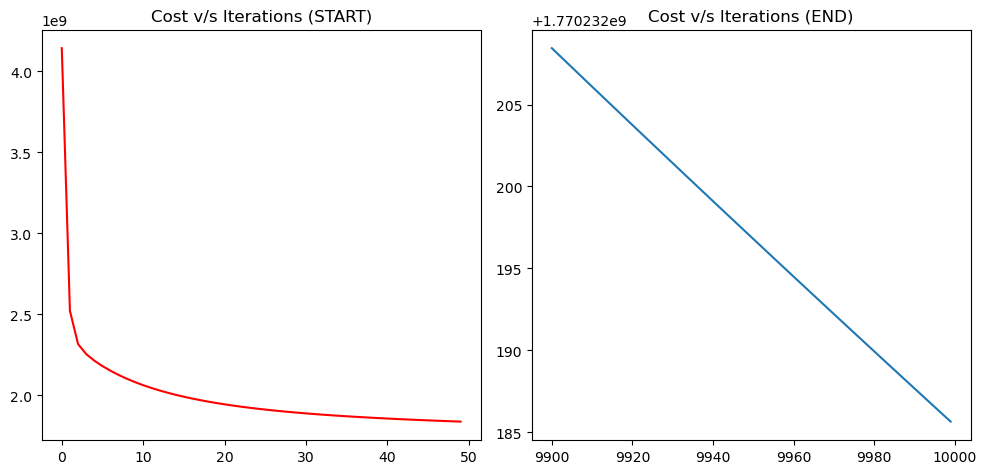

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,5))

axs[0].plot(cost_iteration_np[:50],c='r')
axs[0].set_title("Cost v/s Iterations (START)")
axs[1].plot(9900 + np.arange(100),cost_iteration_np[9900:])
axs[1].set_title("Cost v/s Iterations (END)")
plt.tight_layout()
plt.show()

## Scikit-Learn Implementation ##

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()
start = time.time()
model.fit(X_train_np,y_train_np)
end = time.time()
t = end-start
b_pred = model.intercept_
w_pred = model.coef_
print(f"b: {b_pred}")
print(f"w: {w_pred}")
y_pred_skl = model.predict(X_test)

print("\n\n-------------------------------------------------\n\n")
print("Mean absolute error (MAE): {0}".format(mean_absolute_error(y_test,y_pred_skl)))
print("Root mean square error (RMSE): {0}".format(np.sqrt(mean_squared_error(y_test,y_pred_skl))))
print("R-squared score (R^2 Score): {0}".format(r2_score(y_test,y_pred_skl)))

b: 187301.6013855779
w: [-68066.99486269 -71693.47613005  10230.54007571  -3907.5842951
 -42968.57677776  49506.19737209  52540.46959716  16761.63907708
   4174.78039015   5744.90630226   6106.4926391 ]


-------------------------------------------------


Mean absolute error (MAE): 44105.735652725714
Root mean square error (RMSE): 59177.91096960171
R-squared score (R^2 Score): 0.6034578803290744
